# Installing libraries

In [1]:
!pip install aif360
!pip install fairlearn
!pip install BlackBoxAuditing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for BlackBoxAuditing: filename=BlackBoxAuditing-0.1.54-py2.py3-none-any.whl size=1394756 sha256=5b32adeef762b5ef3cf2b1b6eb14580e716887626f3c71a5114b3dc082a7838b
  Stored in directory: /root/.cache/pip/wheels/c0/4f/b1/80e1b0790df07536470758fe0a4f9ff8fa942fd9fe30bbb192
Successfully built BlackBoxAuditing


In [2]:
%matplotlib inline

# Pre-processing steps

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('/kaggle/input/case-combined/merged_subjects_data.csv')
data

,time,valence,arousal,video_x,Emotion,ecg,bvp,gsr,rsp,skt,emg_zygo,emg_coru,emg_trap,video_y,SUBJECT,AGE,GENDER,EMOTION,video_name,vid_emotion
0,1061504,-1276.0,6252.0,8.0,Frustrated or Impatient,0.76062,35.053549,4.384464,27.174558,28.863552,7.86300,6.13825,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
1,1061554,-1276.0,6252.0,8.0,Frustrated or Impatient,0.79018,35.005141,4.360800,27.193884,28.849530,7.94525,5.76850,5.15250,8.0,1,30-34,F,scary,Mama (2008),scary-2
2,1061604,-1276.0,6268.0,8.0,Frustrated or Impatient,0.80990,35.809029,4.380504,27.213270,28.860030,8.06850,5.72750,5.02950,8.0,1,30-34,F,scary,Mama (2008),scary-2
3,1061654,-1276.0,6268.0,8.0,Frustrated or Impatient,0.83946,37.368456,4.384464,27.281031,28.863552,7.37025,6.09725,5.31675,8.0,1,30-34,F,scary,Mama (2008),scary-2
4,1061704,-1276.0,6288.0,8.0,Frustrated or Impatient,0.79018,37.145698,4.356864,27.271309,28.863552,7.65775,5.89175,5.11150,8.0,1,30-34,F,scary,Mama (2008),scary-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196278,2231442,0.0,0.0,7.0,Neutral,1.05632,37.949645,37.403472,46.155954,29.852173,5.39900,7.53450,5.89175,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196279,2231492,0.0,0.0,7.0,Neutral,0.81318,37.542807,37.419240,46.223715,29.852173,5.64550,7.98625,5.85075,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196280,2231542,0.0,0.0,7.0,Neutral,0.82632,36.961677,37.320672,46.301140,29.845152,5.56325,7.41125,5.72750,7.0,29,25-29,M,scary,Shutter (2004),scary-1
196281,2231592,0.0,0.0,7.0,Neutral,0.83290,36.516101,37.407408,46.397951,29.862694,5.76850,7.57550,5.80975,12.0,29,25-29,M,scary,Shutter (2004),scary-1


In [4]:
data['Emotion'].unique()

array(['Frustrated or Impatient', 'Tensed or Annoyed',
       'Distressed or Defiant', 'Neutral', 'Confident or Attentive',
       'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy',
       'Worried or Apathetic', 'Frustrated or Discontented',
       'Aroused or Astonished', 'Miserable or Sad', 'Anxious or Dejected',
       'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'],
      dtype=object)

In [5]:
# Define positive and negative emotions
positive_emotions = [
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 
    'Delighted or Happy', 'Excited or Adventurous', 'Polite or Sleepy', 
    'Neutral', 'Aroused or Astonished'
]

# Add a new column 'Emotion_Type' to classify emotions as Positive or Negative
data['Emotion_Type'] = data['Emotion'].apply(
    lambda x: 'Positive' if x in positive_emotions else 'Negative'
)
# Define the columns to retain
columns_to_keep = [
    'ecg', 'bvp', 'gsr', 'rsp', 'skt', 'emg_coru', 'emg_trap', 'emg_zygo',  # 8 physio features
    'Emotion', 'AGE', 'GENDER', 'Emotion_Type'  # Other required columns
]

# Create a new DataFrame retaining only the specified columns
data = data[columns_to_keep]

In [6]:
data

,ecg,bvp,gsr,rsp,skt,emg_coru,emg_trap,emg_zygo,Emotion,AGE,GENDER,Emotion_Type
0,0.76062,35.053549,4.384464,27.174558,28.863552,6.13825,5.31675,7.86300,Frustrated or Impatient,30-34,F,Negative
1,0.79018,35.005141,4.360800,27.193884,28.849530,5.76850,5.15250,7.94525,Frustrated or Impatient,30-34,F,Negative
2,0.80990,35.809029,4.380504,27.213270,28.860030,5.72750,5.02950,8.06850,Frustrated or Impatient,30-34,F,Negative
3,0.83946,37.368456,4.384464,27.281031,28.863552,6.09725,5.31675,7.37025,Frustrated or Impatient,30-34,F,Negative
4,0.79018,37.145698,4.356864,27.271309,28.863552,5.89175,5.11150,7.65775,Frustrated or Impatient,30-34,F,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
196278,1.05632,37.949645,37.403472,46.155954,29.852173,7.53450,5.89175,5.39900,Neutral,25-29,M,Positive
196279,0.81318,37.542807,37.419240,46.223715,29.852173,7.98625,5.85075,5.64550,Neutral,25-29,M,Positive
196280,0.82632,36.961677,37.320672,46.301140,29.845152,7.41125,5.72750,5.56325,Neutral,25-29,M,Positive
196281,0.83290,36.516101,37.407408,46.397951,29.862694,7.57550,5.80975,5.76850,Neutral,25-29,M,Positive


Gender and Age Distribution (Heatmap Data):
AGE     20-24  25-29  30-34  35-39
GENDER                            
F       47654  32822  13625      0
M       20440  61304   6812  13626
Total Instances: 196283


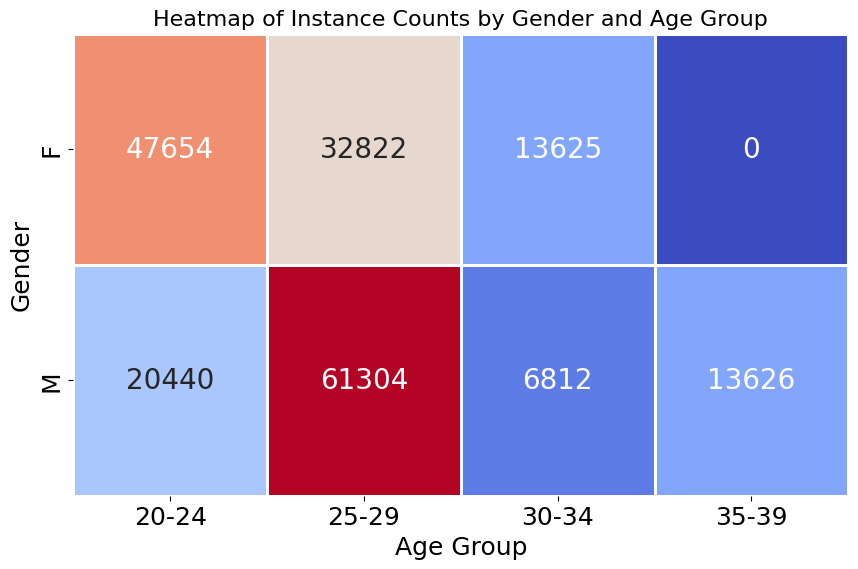


Emotion Type Counts and Percentages:
Emotion
Neutral                       108843
Confident or Attentive         18418
Passionate or Amused           17212
Frustrated or Impatient        16325
Distressed or Defiant          11175
Worried or Apathetic            6601
Tensed or Annoyed               4845
Delighted or Happy              4296
Pleased or Glad                 2963
Frustrated or Discontented      1823
Tired or Bored                  1195
Aroused or Astonished           1152
Polite or Sleepy                 982
Miserable or Sad                 247
Anxious or Dejected              157
Excited or Adventurous            49
Name: count, dtype: int64
Emotion
Neutral                       55.452077
Confident or Attentive         9.383390
Passionate or Amused           8.768971
Frustrated or Impatient        8.317073
Distressed or Defiant          5.693310
Worried or Apathetic           3.363001
Tensed or Annoyed              2.468375
Delighted or Happy             2.188677
Pleased 

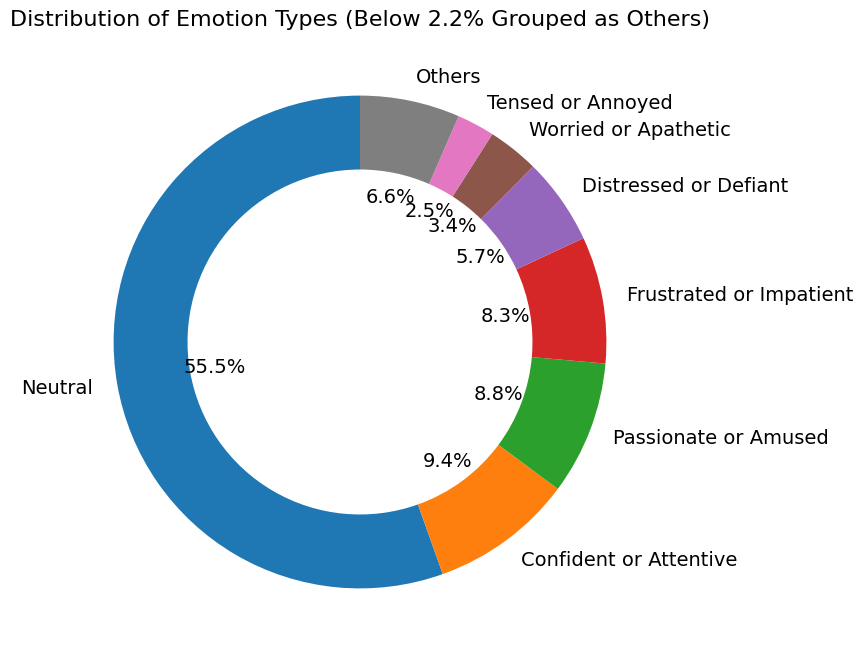


Number of Instances with 'Neutral': 108843

Emotion Type Counts (Excluding Neutral):
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sleepy                982
Miserable or Sad                247
Anxious or Dejected             157
Excited or Adventurous           49
Name: count, dtype: int64
Total Instances (Excluding Neutral): 87440
Emotion Type Percentages (Excluding Neutral):
Emotion
Confident or Attentive        21.063586
Passionate or Amused          19.684355
Frustrated or Impatient       18.669945
Distressed or Defiant         12.780192
Worried or Apathetic           7.549177
Tensed or Annoyed              5.540942
Del

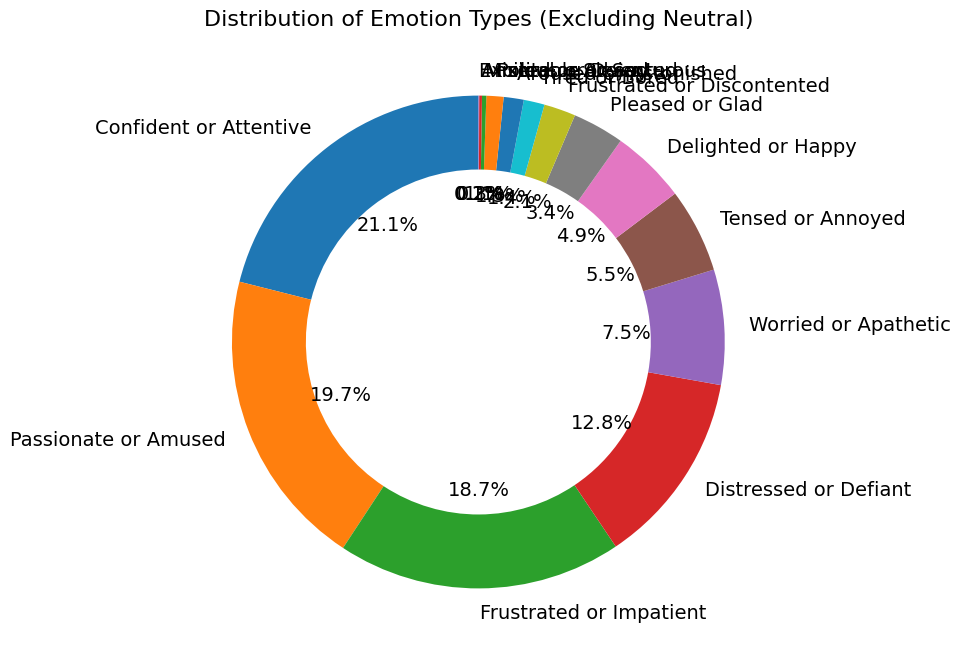


Age Group Distribution:
AGE
25-29    94126
20-24    68094
30-34    20437
35-39    13626
Name: count, dtype: int64
Total Instances in Age Groups: 196283


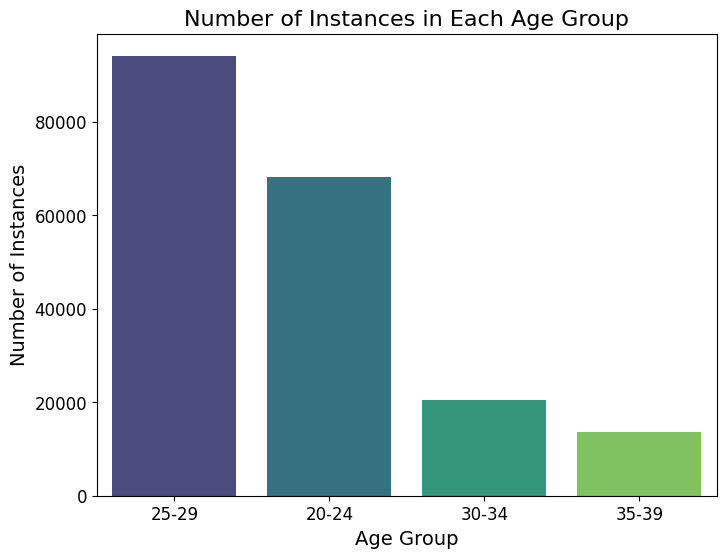


Gender Distribution:
GENDER
M    102182
F     94101
Name: count, dtype: int64
Total Instances in Gender Classes: 196283


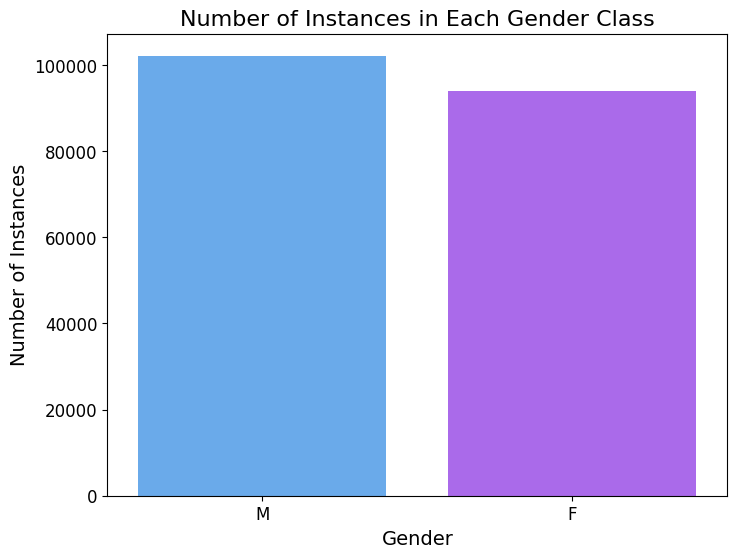

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (replace with your dataset)
# data = pd.read_csv("your_data.csv")

# 1. Heatmap for Gender and Age Distribution
plt.figure(figsize=(10, 6))

# Grouping data by Gender and Age and calculating the count
heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)

# Print the heatmap data and total count
print("Gender and Age Distribution (Heatmap Data):")
print(heatmap_data)
print(f"Total Instances: {heatmap_data.sum().sum()}")  # Total instances in the heatmap data

# Create the heatmap
sns.heatmap(
    heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
    annot_kws={"size": 20}  # Adjust text size
)
plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Gender', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# 2. Donut Chart for Emotion_Type Distribution (with threshold)
percentage_threshold = 2.2  # Set the percentage threshold (e.g., 5%)
emotion_type_counts = data['Emotion'].value_counts()

# Calculate percentages
total_count = emotion_type_counts.sum()
emotion_type_percentages = (emotion_type_counts / total_count) * 100

# Print the emotion type counts, percentages, and total instances
print("\nEmotion Type Counts and Percentages:")
print(emotion_type_counts)
print(emotion_type_percentages)
print(f"Total Instances: {total_count}")  # Total instances in emotion type data

# Group smaller categories
emotion_type_counts_filtered = emotion_type_counts[emotion_type_percentages >= percentage_threshold]
others_count = emotion_type_counts[emotion_type_percentages < percentage_threshold].sum()
if others_count > 0:
    emotion_type_counts_filtered["Others"] = others_count

# Plot the initial donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_filtered, labels=emotion_type_counts_filtered.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title(f'Distribution of Emotion Types (Below {percentage_threshold}% Grouped as Others)', fontsize=16)
plt.show()

# 3. Remove 'Neutral' instances and plot donut chart again
# Print the count of 'Neutral' instances before excluding
neutral_count = data[data['Emotion'] == 'Neutral'].shape[0]
print(f"\nNumber of Instances with 'Neutral': {neutral_count}")

# Remove 'Neutral' instances
data_no_neutral = data[data['Emotion'] != 'Neutral']

# Recalculate emotion type counts and percentages for non-neutral instances
emotion_type_counts_no_neutral = data_no_neutral['Emotion'].value_counts()

# Print the filtered emotion type counts and total instances
print("\nEmotion Type Counts (Excluding Neutral):")
print(emotion_type_counts_no_neutral)
print(f"Total Instances (Excluding Neutral): {emotion_type_counts_no_neutral.sum()}")  # Total instances excluding 'Neutral'

# Calculate percentages for non-neutral instances
emotion_type_percentages_no_neutral = (emotion_type_counts_no_neutral / emotion_type_counts_no_neutral.sum()) * 100
print("Emotion Type Percentages (Excluding Neutral):")
print(emotion_type_percentages_no_neutral)

# Plot the donut chart again without Neutral instances
plt.figure(figsize=(8, 8))
plt.pie(
    emotion_type_counts_no_neutral, labels=emotion_type_counts_no_neutral.index, autopct='%1.1f%%', 
    startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
)
plt.title('Distribution of Emotion Types (Excluding Neutral)', fontsize=16)
plt.show()

# 4. Bar Plot for Age Group Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each age group
age_counts = data['AGE'].value_counts()

# Print the age group distribution and total instances
print("\nAge Group Distribution:")
print(age_counts)
print(f"Total Instances in Age Groups: {age_counts.sum()}")  # Total instances in age groups

# Create the bar plot
sns.barplot(
    x=age_counts.index,
    y=age_counts.values,
    palette='viridis'
)
plt.title('Number of Instances in Each Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 5. Bar Plot for Gender Distribution
plt.figure(figsize=(8, 6))

# Count the instances for each gender
gender_counts = data['GENDER'].value_counts()

# Print the gender distribution and total instances
print("\nGender Distribution:")
print(gender_counts)
print(f"Total Instances in Gender Classes: {gender_counts.sum()}")  # Total instances in gender classes

# Create the bar plot
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='cool'
)
plt.title('Number of Instances in Each Gender Class', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Instances', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Missing values before cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64

Missing values after cleaning:
ecg             1
bvp             1
gsr             1
rsp             1
skt             1
emg_coru        1
emg_trap        1
emg_zygo        1
Emotion         0
AGE             0
GENDER          0
Emotion_Type    0
dtype: int64
Target size per class: 2963

Old Emotion Class Distribution:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Pleased or Glad                2963
Frustrated or Discontented     1823
Tired or Bored                 1195
Aroused or Astonished          1152
Polite or Sle

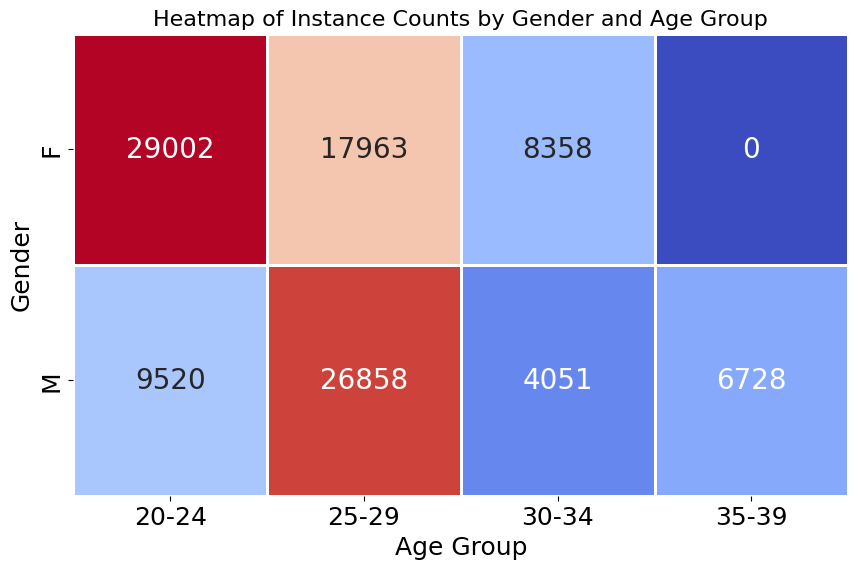


Emotion Distribution Information:
Emotion
Confident or Attentive        18418
Passionate or Amused          17212
Frustrated or Impatient       16325
Distressed or Defiant         11175
Worried or Apathetic           6601
Tensed or Annoyed              4845
Delighted or Happy             4296
Tired or Bored                 3154
Pleased or Glad                2963
Anxious or Dejected            2962
Excited or Adventurous         2959
Aroused or Astonished          2958
Polite or Sleepy               2948
Miserable or Sad               2939
Frustrated or Discontented     2809
Name: count, dtype: int64
Total Instances in Emotion Distribution: 102564
Percentages for each class:
Emotion
Confident or Attentive        17.957568
Passionate or Amused          16.781717
Frustrated or Impatient       15.916891
Distressed or Defiant         10.895636
Worried or Apathetic           6.435981
Tensed or Annoyed              4.723880
Delighted or Happy             4.188604
Tired or Bored             

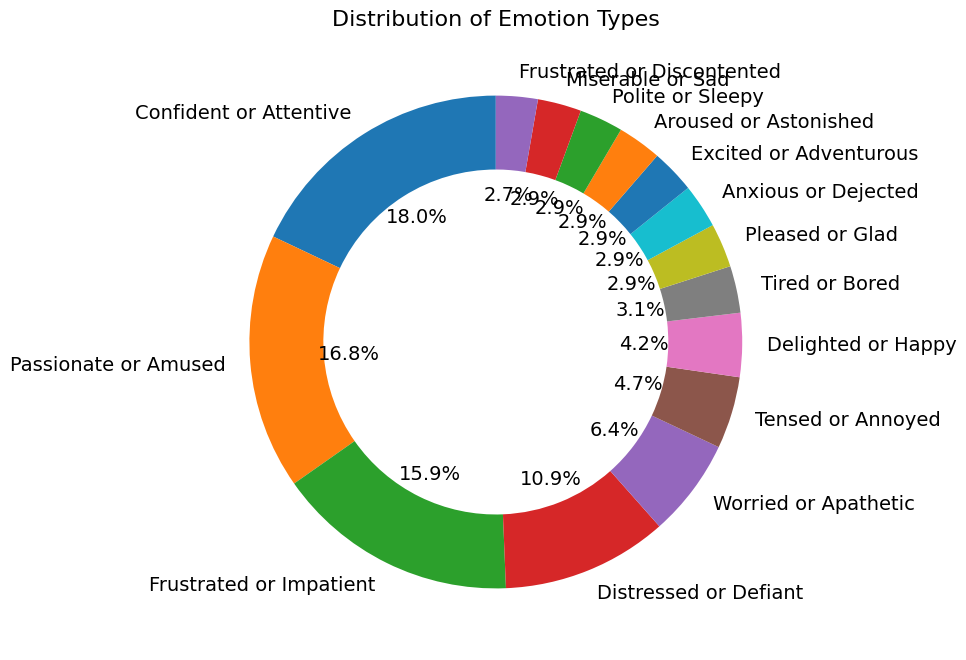


Age Group Distribution Information:
AGE
25-29    44821
20-24    38528
30-34    12409
35-39     6728
Name: count, dtype: int64
Total Instances in Age Group Distribution: 102486


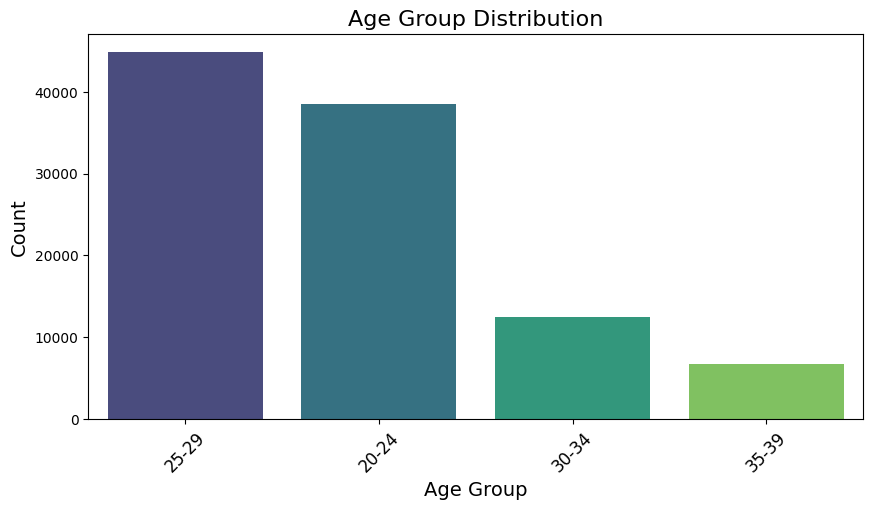

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

def clean_data(data):
    """Cleans data by handling missing values in crucial columns."""
    df = data.copy()
    print("Missing values before cleaning:")
    print(df.isnull().sum())
    
    # Drop rows where crucial columns ('Emotion', 'GENDER', 'AGE') have missing values
    crucial_columns = ['Emotion', 'GENDER', 'AGE']
    df = df.dropna(subset=crucial_columns)

    df = df[df['Emotion'] != 'Neutral']
    
    print("\nMissing values after cleaning:")
    print(df.isnull().sum())
    return df

def balance_emotion_data(data):
    """Balances the Emotion data using ADASYN or SMOTE."""
    
    df = data.copy()
    
    # Calculate target size for balanced classes
    emotion_counts = df['Emotion'].value_counts()
    target_size = int(np.median(emotion_counts))  # Use median as target size for balancing
    print(f"Target size per class: {target_size}")
    
    print("\nOld Emotion Class Distribution:")
    print(emotion_counts)
    print(f"Total Instances before balancing: {emotion_counts.sum()}")
    
    X = df.drop(['Emotion', 'Emotion_Type'], axis=1)
    y = df['Emotion']
    
    # Convert categorical variables to numeric codes
    X['GENDER'] = pd.Categorical(X['GENDER']).codes
    X['AGE'] = pd.Categorical(X['AGE']).codes
    
    # Handle missing values in numeric columns
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    imputer = SimpleImputer(strategy='mean')
    X_imputed = X.copy()
    X_imputed[numeric_columns] = imputer.fit_transform(X[numeric_columns])
    
    # Handle missing values in target variable 'y' if any
    y = y.fillna(y.mode()[0])
    
    # Create sampling strategy dictionary to control synthetic data generation
    sampling_strategy = {}
    for emotion in y.unique():
        count = Counter(y)[emotion]
        if count < target_size:
            sampling_strategy[emotion] = target_size
    
    # Apply ADASYN for resampling
    try:
        adasyn = ADASYN(random_state=42, n_neighbors=5, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)
        
        print("\nNew Emotion Class Distribution:")
        print(Counter(y_resampled))
        print(f"Total Instances after balancing: {sum(Counter(y_resampled).values())}")
        
    except ValueError as e:
        print(f"ADASYN failed with error: {str(e)}")
        print("Falling back to SMOTE...")
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy)
        X_resampled, y_resampled = smote.fit_resample(X_imputed, y)
    
    # Convert back to DataFrame
    df_resampled = pd.DataFrame(X_resampled, columns=X_imputed.columns)
    df_resampled['Emotion'] = y_resampled
    
    # Convert numeric values back to categorical
    gender_map = {0: 'F', 1: 'M'}
    age_map = {0: '20-24', 1: '25-29', 2: '30-34', 3: '35-39'}
    
    df_resampled['GENDER'] = df_resampled['GENDER'].map(gender_map)
    df_resampled['AGE'] = df_resampled['AGE'].map(age_map)
    print(df_resampled.head())
    
    # Add back 'Emotion_Type'
    emotion_type_map = dict(zip(data['Emotion'], data['Emotion_Type']))
    df_resampled['Emotion_Type'] = df_resampled['Emotion'].map(emotion_type_map)
    
    return df_resampled, df

def create_visualizations(data, old_data):
    """Creates visualizations for the dataset."""
    
    print("\nHeatmap Information:")
    heatmap_data = data.groupby(['GENDER', 'AGE']).size().unstack(fill_value=0)
    print(heatmap_data)
    print(f"Total Instances in Heatmap: {heatmap_data.sum().sum()}")
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=1, cbar=False,
        annot_kws={"size": 20}
    )
    plt.title('Heatmap of Instance Counts by Gender and Age Group', fontsize=16)
    plt.xlabel('Age Group', fontsize=18)
    plt.ylabel('Gender', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    
    print("\nEmotion Distribution Information:")
    emotion_counts = data['Emotion'].value_counts()
    total_count = emotion_counts.sum()
    emotion_percentages = (emotion_counts / total_count) * 100
    print(emotion_counts)
    print(f"Total Instances in Emotion Distribution: {total_count}")
    print("Percentages for each class:")
    print(emotion_percentages)
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14}, wedgeprops={'width': 0.3}
    )
    plt.title('Distribution of Emotion Types', fontsize=16)
    plt.show()
    
    print("\nAge Group Distribution Information:")
    age_counts = data['AGE'].value_counts()
    print(age_counts)
    print(f"Total Instances in Age Group Distribution: {age_counts.sum()}")
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Age Group Distribution', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()
    
cleaned_data = clean_data(data)
balanced_data, old_data = balance_emotion_data(cleaned_data)
create_visualizations(balanced_data, old_data)

In [9]:
print(len(balanced_data))
df = balanced_data
df['AGE'] = df['AGE'].replace({'20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39'})
protected_attribute_names = ['AGE', 'GENDER']
df['AGE'] = df['AGE'].map({"20-29": 0, "30-39": 1})
df['GENDER'] = df['GENDER'].map({"F": 0, "M": 1})
emotion_labels = [
    'Frustrated or Impatient', 'Tensed or Annoyed', 'Distressed or Defiant', 
    'Confident or Attentive', 'Passionate or Amused', 'Pleased or Glad', 'Delighted or Happy', 
    'Worried or Apathetic', 'Frustrated or Discontented', 'Aroused or Astonished', 'Miserable or Sad', 
    'Anxious or Dejected', 'Tired or Bored', 'Polite or Sleepy', 'Excited or Adventurous'
]
label_to_num = {label: num for num, label in enumerate(emotion_labels)}
print("Emotion Labels and Corresponding Encodings:")
print(label_to_num)
df['Emotion'] = df['Emotion'].replace(label_to_num)
emotion_type_map = {'Positive': 1, 'Negative': 0}
df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)
# Drop missing values
df = df.dropna()

102564
Emotion Labels and Corresponding Encodings:
{'Frustrated or Impatient': 0, 'Tensed or Annoyed': 1, 'Distressed or Defiant': 2, 'Confident or Attentive': 3, 'Passionate or Amused': 4, 'Pleased or Glad': 5, 'Delighted or Happy': 6, 'Worried or Apathetic': 7, 'Frustrated or Discontented': 8, 'Aroused or Astonished': 9, 'Miserable or Sad': 10, 'Anxious or Dejected': 11, 'Tired or Bored': 12, 'Polite or Sleepy': 13, 'Excited or Adventurous': 14}


<ipython-input-9-1008d6e0ffc7>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion'] = df['Emotion'].replace(label_to_num)
<ipython-input-9-1008d6e0ffc7>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Emotion_Type'] = df['Emotion_Type'].replace(emotion_type_map)


In [10]:
# Define label and protected attributes
label_names = ['Emotion_Type']



In [11]:
import tensorflow as tf

# Fair AI (AIF360) - Fairness Metrics

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time

# TensorFlow/Keras imports
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Conv1D, Flatten, Dense, MaxPooling1D, Dropout, BatchNormalization, 
    GRU, SimpleRNN, LSTM, SpatialDropout1D, LeakyReLU
)
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

# Scikit-learn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, classification_report, 
    confusion_matrix, roc_curve, auc, f1_score
)
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

# AIF360 fairness toolkit imports
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric, MDSSClassificationMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing, LFR
from aif360.algorithms.inprocessing import ExponentiatedGradientReduction

# Define positive emotion numbers
positive_emotion_numbers = [0.0, 4.0, 5.0, 6.0, 7.0, 10.0, 14.0, 15.0]

In [13]:
def compute_fairness_metrics_MDSSCM(original_dataset, classified_dataset, privileged_groups, unprivileged_groups, description):
    global fairness_results
    
    metrics = ClassificationMetric(
        original_dataset,
        classified_dataset,
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups
    )
    consistency_value = metrics.consistency()
    if isinstance(consistency_value, (np.ndarray, list)):
        consistency_value = np.mean(consistency_value)
    
    fairness_metrics = {
        "Description": description,
        "Accuracy": metrics.accuracy(),
        "Base Rate": metrics.base_rate(),
        "Selection Rate": metrics.selection_rate(),
        "Disparate Impact": metrics.disparate_impact(),
        "Statistical Parity Difference": metrics.statistical_parity_difference(),
        "Between Group Coefficient of Variation": metrics.between_group_coefficient_of_variation(),
        "Between Group Generalized Entropy Index": metrics.between_group_generalized_entropy_index(),
        "Between Group Theil Index": metrics.between_group_theil_index(),
        "Mean Difference": metrics.mean_difference(),
        "Smoothed Empirical Differential Fairness": metrics.smoothed_empirical_differential_fairness(),
        "Consistency": consistency_value,
        "Average Absolute Odds Difference": metrics.average_abs_odds_difference(),
        "Average Odds Difference": metrics.average_odds_difference(),
        "Average Predictive Value Difference": metrics.average_predictive_value_difference(),
        "Between All Groups Coefficient of Variation": metrics.between_all_groups_coefficient_of_variation(),
        "Between All Groups Generalized Entropy Index": metrics.between_all_groups_generalized_entropy_index(),
        "Between All Groups Theil Index": metrics.between_all_groups_theil_index(),
        "Coefficient of Variation": metrics.coefficient_of_variation(),
        "Differential Fairness Bias Amplification": metrics.differential_fairness_bias_amplification(),
        "Equal Opportunity Difference": metrics.equal_opportunity_difference(),
        "Equalized Odds Difference": metrics.equalized_odds_difference(),
        "Error Rate": metrics.error_rate(),
        "Error Rate Difference": metrics.error_rate_difference(),
        "Error Rate Ratio": metrics.error_rate_ratio(),
        "False Discovery Rate": metrics.false_discovery_rate(),
        "False Discovery Rate Difference": metrics.false_discovery_rate_difference(),
        "False Discovery Rate Ratio": metrics.false_discovery_rate_ratio(),
        "False Negative Rate": metrics.false_negative_rate(),
        "False Negative Rate Difference": metrics.false_negative_rate_difference(),
        "False Negative Rate Ratio": metrics.false_negative_rate_ratio(),
        "False Omission Rate": metrics.false_omission_rate(),
        "False Omission Rate Difference": metrics.false_omission_rate_difference(),
        "False Omission Rate Ratio": metrics.false_omission_rate_ratio(),
        "False Positive Rate": metrics.false_positive_rate(),
        "False Positive Rate Difference": metrics.false_positive_rate_difference(),
        "False Positive Rate Ratio": metrics.false_positive_rate_ratio(),
        "Generalized Entropy Index": metrics.generalized_entropy_index(),
        "Generalized Equalized Odds Difference": metrics.generalized_equalized_odds_difference(),
        "Generalized False Negative Rate": metrics.generalized_false_negative_rate(),
        "Generalized False Positive Rate": metrics.generalized_false_positive_rate(),
        "Generalized True Negative Rate": metrics.generalized_true_negative_rate(),
        "Generalized True Positive Rate": metrics.generalized_true_positive_rate(),
        "Negative Predictive Value": metrics.negative_predictive_value(),
        "Number of False Negatives": metrics.num_false_negatives(),
        "Number of False Positives": metrics.num_false_positives(),
        "Number of Generalized False Negatives": metrics.num_generalized_false_negatives(),
        "Number of Generalized False Positives": metrics.num_generalized_false_positives(),
        "Number of Generalized True Negatives": metrics.num_generalized_true_negatives(),
        "Number of Generalized True Positives": metrics.num_generalized_true_positives(),
        "Number of Instances": metrics.num_instances(),
        "Number of Negatives": metrics.num_negatives(),
        "Number of Positives": metrics.num_positives(),
        "Number of Predicted Negatives": metrics.num_pred_negatives(),
        "Number of Predicted Positives": metrics.num_pred_positives(),
        "Number of True Negatives": metrics.num_true_negatives(),
        "Number of True Positives": metrics.num_true_positives(),
        "Positive Predictive Value": metrics.positive_predictive_value(),
        "Power": metrics.power(),
        "Precision": metrics.precision(),
        "Recall": metrics.recall(),
        "Selection Rate": metrics.selection_rate(),
        "Sensitivity": metrics.sensitivity(),
        "Specificity": metrics.specificity(),
        "Theil Index": metrics.theil_index(),
        "True Negative Rate": metrics.true_negative_rate(),
        "True Positive Rate": metrics.true_positive_rate(),
        "True Positive Rate Difference": metrics.true_positive_rate_difference()
    }
    fairness_metrics_df = pd.DataFrame([fairness_metrics])
    fairness_results = pd.concat([fairness_results, fairness_metrics_df], ignore_index=True)

    
    return metrics

In [14]:
protected_attribute_configs = [
    {
        "desc" : "GENDER Mitigation",
        "protected_attribute_names": ["GENDER"],
        "privileged_protected_attributes": [{"GENDER": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1}],
        "sensitive_attribute": "GENDER"
    },
    {
        "desc" : "AGE Mitigation",
        "protected_attribute_names": ["AGE"],
        "privileged_protected_attributes": [{"AGE": 0}],
        "unprivileged_protected_attributes": [{"AGE": 1}],
        "sensitive_attribute": "AGE"
    },
    {
        
        "desc" : "AGE&GENDER Mitigation",
        "protected_attribute_names": ["GENDER", "AGE"],
        "privileged_protected_attributes": [{"GENDER": 0, "AGE": 0}],
        "unprivileged_protected_attributes": [{"GENDER": 1, "AGE": 1}],
        "sensitive_attribute": "AGE"
    }
]

fairness_results = pd.DataFrame({
    "Description": ["Ideal Values"],  # Start with the Ideal Values row
    "Accuracy": 'N/A',  # Ideal value (context-dependent)
    "Base Rate": 'N/A',  # Ideal value (depends on context)
    "Selection Rate": 'N/A',  # Ideal value (depends on context)
    "Disparate Impact": [1.0],  # Ideal value
    "Statistical Parity Difference": [0.0],  # Ideal value
    "Between Group Coefficient of Variation": [0.0],  # Ideal value
    "Between Group Generalized Entropy Index": [0.0],  # Ideal value
    "Between Group Theil Index": [0.0],  # Ideal value
    "Mean Difference": [0.0],  # Ideal value
    "Smoothed Empirical Differential Fairness": [0.0],  # Ideal value
    "Consistency": [1.0],  # Ideal value
    "Average Absolute Odds Difference": 'N/A',  # Ideal value (context-dependent)
    "Average Odds Difference": 'N/A',  # Ideal value (context-dependent)
    "Average Predictive Value Difference": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Coefficient of Variation": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Generalized Entropy Index": 'N/A',  # Ideal value (context-dependent)
    "Between All Groups Theil Index": 'N/A',  # Ideal value (context-dependent)
    "Coefficient of Variation": 'N/A',  # Ideal value (context-dependent)
    "Differential Fairness Bias Amplification": 'N/A',  # Ideal value (context-dependent)
    "Equal Opportunity Difference": [0.0],  # Ideal value
    "Equalized Odds Difference": [0.0],  # Ideal value
    "Error Rate": [0.0],  # Ideal value
    "Error Rate Difference": [0.0],  # Ideal value
    "Error Rate Ratio": [1.0],  # Ideal value
    "False Discovery Rate": [0.0],  # Ideal value
    "False Discovery Rate Difference": [0.0],  # Ideal value
    "False Discovery Rate Ratio": [1.0],  # Ideal value
    "False Negative Rate": [0.0],  # Ideal value
    "False Negative Rate Difference": [0.0],  # Ideal value
    "False Negative Rate Ratio": [1.0],  # Ideal value
    "False Omission Rate": [0.0],  # Ideal value
    "False Omission Rate Difference": [0.0],  # Ideal value
    "False Omission Rate Ratio": [1.0],  # Ideal value
    "False Positive Rate": [0.0],  # Ideal value
    "False Positive Rate Difference": [0.0],  # Ideal value
    "False Positive Rate Ratio": [1.0],  # Ideal value
    "Generalized Entropy Index": 'N/A',  # Ideal value (context-dependent)
    "Generalized Equalized Odds Difference": [0.0],  # Ideal value
    "Generalized False Negative Rate": [0.0],  # Ideal value
    "Generalized False Positive Rate": [0.0],  # Ideal value
    "Generalized True Negative Rate": [1.0],  # Ideal value
    "Generalized True Positive Rate": [1.0],  # Ideal value
    "Negative Predictive Value": 'N/A',  # Ideal value (context-dependent)
    "Number of False Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of False Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized False Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized False Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized True Negatives": 'N/A',  # Ideal value (context-dependent)
    "Number of Generalized True Positives": 'N/A',  # Ideal value (context-dependent)
    "Number of Instances": 'N/A',  # Ideal value (depends on context)
    "Number of Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of Positives": 'N/A',  # Ideal value (depends on context)
    "Number of Predicted Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of Predicted Positives": 'N/A',  # Ideal value (depends on context)
    "Number of True Negatives": 'N/A',  # Ideal value (depends on context)
    "Number of True Positives": 'N/A',  # Ideal value (depends on context)
    "Positive Predictive Value": 'N/A',  # Ideal value (context-dependent)
    "Power": 'N/A',  # Ideal value (context-dependent)
    "Precision": 'N/A',  # Ideal value (context-dependent)
    "Recall": 'N/A',  # Ideal value (context-dependent)
    "Selection Rate": 'N/A',  # Ideal value (context-dependent)
    "Sensitivity": 'N/A',  # Ideal value (context-dependent)
    "Specificity": 'N/A',  # Ideal value (context-dependent)
    "Theil Index": 'N/A',  # Ideal value (context-dependent)
    "True Negative Rate": [1.0],  # Ideal value
    "True Positive Rate": [1.0],  # Ideal value
    "True Positive Rate Difference": [0.0]  # Ideal value
})


In [15]:
fairness_results

,Description,Accuracy,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,...,Positive Predictive Value,Power,Precision,Recall,Sensitivity,Specificity,Theil Index,True Negative Rate,True Positive Rate,True Positive Rate Difference
0,Ideal Values,N/A,N/A,N/A,1.0,0.0,0.0,0.0,0.0,0.0,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.0,1.0,0.0


In [16]:

model_performance = pd.DataFrame(columns=[
    'model_type', 'accuracy', 'precision', 'recall', 'f1_score', 
    'inference_time_total', 'inference_time_per_sample_us'
])

# MLP

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total inference time: 0.9259 seconds
Inference time per sample: 90.34 microseconds
Accuracy: 0.9099
Precision: 0.9096
Recall: 0.9099
F1-Score: 0.9082
Model performance metrics saved to model_performance.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1628
           1       0.92      0.70      0.79       489
           2       0.92      0.94      0.93      1107
           3       0.93      0.93      0.93      1872
           4       0.94      0.92      0.93      1722
           5       0.86      0.87      0.87       294
           6       0.92      0.86      0.89       437
           7       0.95      0.93      0.94       667
           8       0.71      0.53      0.61       296
           9       0.85      0.93      0.89       311
          10       0.89      0.96      0.93       279
          11       0.97      1.00      0.98       298
          12       0.94   

<ipython-input-17-30ae8cc64234>:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_performance = pd.concat([model_performance, new_entry], ignore_index=True)


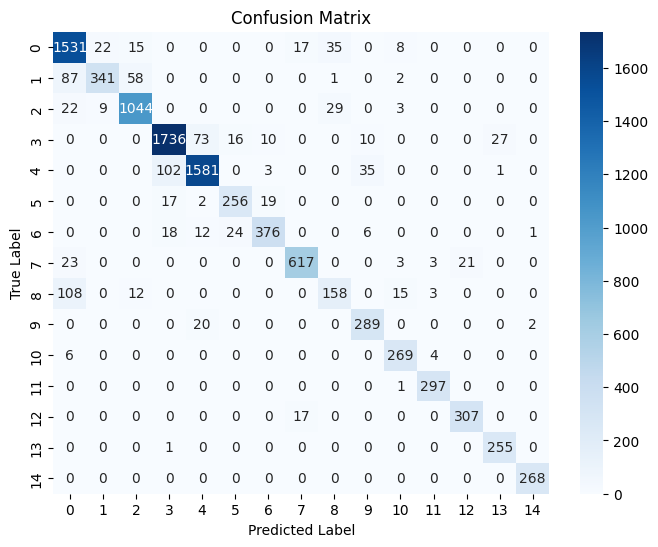

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,975 (238.19 KB)

 Trainable params: 20,239 (79.06 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 40,480 (158.13 KB)

Model saved to mlp_model.h5


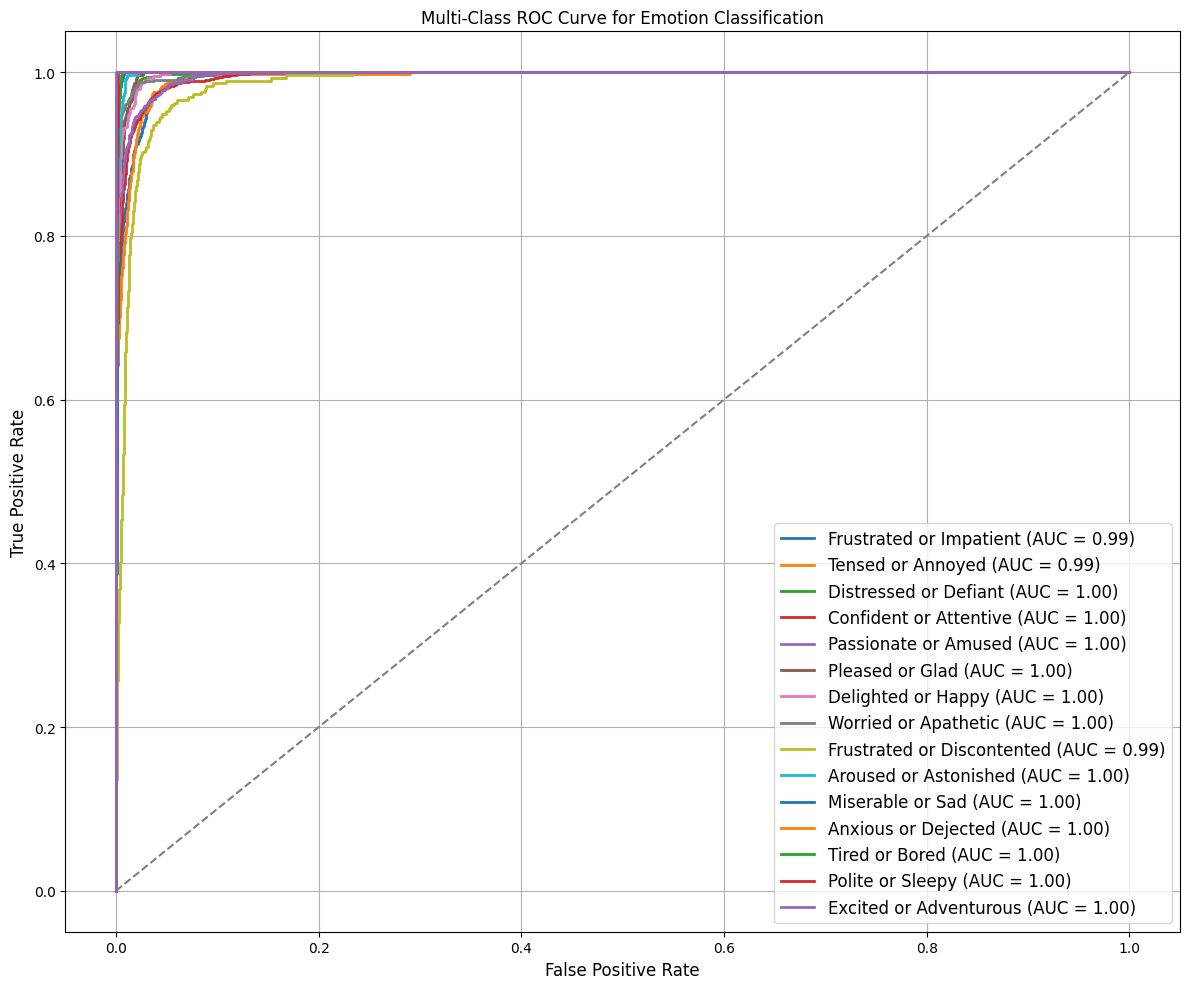

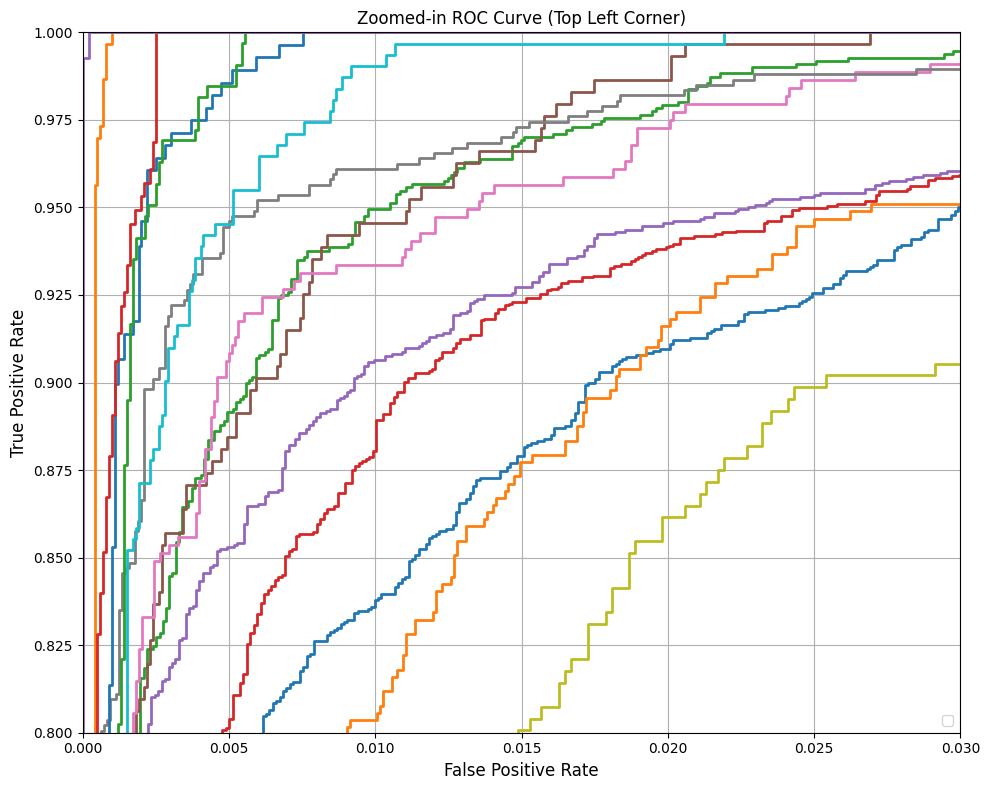

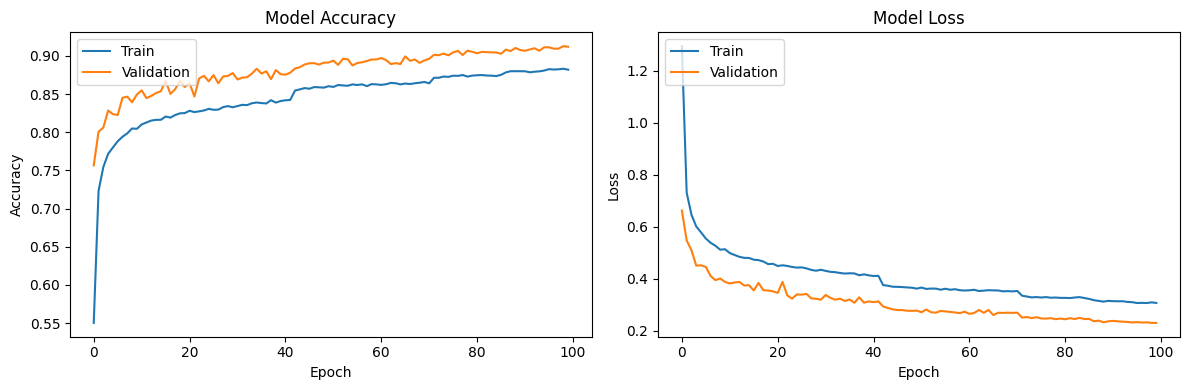

In [17]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_mlp_model(input_shape, num_classes):
    model = Sequential()
    
    model.add(Input(shape=input_shape))
    # First fully connected layer with 128 units
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    
    # Second fully connected layer with 64 units
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    # Adam optimizer with custom learning rate
    optimizer = Adam(learning_rate=0.000924)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data (assuming 'df' is already loaded as your DataFrame)
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

input_shape = (X_train.shape[1],)  # Input shape for MLP (one-dimensional input vector)
num_classes = len(np.unique(y))    # Number of unique classes in the target variable

# Build and train MLP model
mlp_model = build_mlp_model(input_shape, num_classes)
history = mlp_model.fit(
    X_train, y_train,
    epochs=100, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr],
    verbose=0
)

# Measure inference time
start_time = time.time()
predictions = mlp_model.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
inference_time_per_sample_us = inference_time_per_sample * 1_000_000  # Convert to microseconds
print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_us:.2f} microseconds")

predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics including F1-score
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted')
recall = recall_score(y_test, predicted_labels, average='weighted')
f1 = f1_score(y_test, predicted_labels, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Add new entry to model_performance DataFrame
new_entry = pd.DataFrame({
    'model_type': ['MLP'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'inference_time_total': [inference_time],
    'inference_time_per_sample_us': [inference_time_per_sample_us]
})

model_performance = pd.concat([model_performance, new_entry], ignore_index=True)

# Save updated DataFrame
model_performance.to_csv('model_performance.csv', index=False)
print("Model performance metrics saved to model_performance.csv")

# Classification Report
class_report = classification_report(y_test, predicted_labels)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

mlp_model.summary()
model_filename = 'mlp_model.h5'
mlp_model.save(model_filename)
print(f"Model saved to {model_filename}")

# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

plt.show()

# MLP - Fairness

In [18]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]

    # Creating BinaryLabelDataset
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"MLP {desc}")
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Learning Fair Representations method
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Perform splits for data
    train_dir, temp_dir = dir_processed.split([0.8], shuffle=True)
    val_dir, test_dir = temp_dir.split([0.5], shuffle=True)
    
    train_reweighed, temp_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    val_reweighed, test_reweighed = temp_reweighed.split([0.5], shuffle=True)
    
    train_lfr, temp_lfr = lfr_processed.split([0.8], shuffle=True)
    val_lfr, test_lfr = temp_lfr.split([0.5], shuffle=True)
    
    # Convert to DataFrame
    train_dir_df, val_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        val_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, val_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        val_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    train_lfr_df, val_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        val_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    lfr_weights = train_lfr.instance_weights
    
    def prepare_data_for_mlp(dataset):
        # For MLP, we use the flat feature array without reshaping to 3D
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return features.values, labels
    
    # Prepare data for MLP model
    X_train_dir, y_train_dir = prepare_data_for_mlp(train_dir_df)
    X_val_dir, y_val_dir = prepare_data_for_mlp(val_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_mlp(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_mlp(train_reweighed_df)
    X_val_reweighed, y_val_reweighed = prepare_data_for_mlp(val_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_mlp(test_reweighed_df)
    
    X_train_lfr, y_train_lfr = prepare_data_for_mlp(train_lfr_df)
    X_val_lfr, y_val_lfr = prepare_data_for_mlp(val_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_mlp(test_lfr_df)
    
    # Train Disparate Impact Remover model
    mlp_dir = build_mlp_model((X_train_dir.shape[1],), num_classes)
    mlp_dir.fit(
        X_train_dir, y_train_dir, 
        epochs=100, batch_size=32, 
        sample_weight=dir_weights,  
        validation_data=(X_val_dir, y_val_dir), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_dir = np.argmax(mlp_dir.predict(X_test_dir), axis=1)
    
    # Train Reweighing model
    mlp_reweighed = build_mlp_model((X_train_reweighed.shape[1],), num_classes)
    mlp_reweighed.fit(
        X_train_reweighed, y_train_reweighed, 
        epochs=100, batch_size=32, 
        sample_weight=rw_weights,  
        validation_data=(X_val_reweighed, y_val_reweighed), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_reweighed = np.argmax(mlp_reweighed.predict(X_test_reweighed), axis=1)
    
    # Train LFR model
    mlp_lfr = build_mlp_model((X_train_lfr.shape[1],), num_classes)
    mlp_lfr.fit(
        X_train_lfr, y_train_lfr, 
        epochs=100, batch_size=32, 
        sample_weight=lfr_weights,  
        validation_data=(X_val_lfr, y_val_lfr), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_lfr = np.argmax(mlp_lfr.predict(X_test_lfr), axis=1)
    
    # Prepare prediction dataframes for metrics computation
    pred_reweighed_df, pred_dir_df = test_reweighed_df.copy(), test_dir_df.copy()
    pred_lfr_df = test_lfr_df.copy()
    
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    pred_dir_df['Emotion'] = y_pred_dir
    pred_lfr_df['Emotion'] = y_pred_lfr
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"MLP DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"MLP Reweighed {desc}")
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"MLP LFR {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# GRU

In [19]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_gru_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # Single GRU Layer with 128 units
    model.add(GRU(128))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000924)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train GRU model
gru_model = build_gru_model(input_shape, num_classes)
history = gru_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Measure inference time
start_time = time.time()
predictions = gru_model.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
inference_time_per_sample_us = inference_time_per_sample * 1_000_000  # Convert to microseconds
print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_us:.2f} microseconds")

predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics including F1-score with zero_division parameter
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(y_test, predicted_labels, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create or update model_performance DataFrame
try:
    # Try to load existing DataFrame if it exists
    model_performance = pd.read_csv('model_performance.csv')
except FileNotFoundError:
    # Create new DataFrame if it doesn't exist
    model_performance = pd.DataFrame(columns=[
        'model_type', 'accuracy', 'precision', 'recall', 'f1_score', 
        'inference_time_total', 'inference_time_per_sample_us'
    ])

# Add new entry to model_performance DataFrame
new_entry = pd.DataFrame({
    'model_type': ['GRU'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'inference_time_total': [inference_time],
    'inference_time_per_sample_us': [inference_time_per_sample_us]
})

model_performance = pd.concat([model_performance, new_entry], ignore_index=True)

# Save updated DataFrame
model_performance.to_csv('model_performance.csv', index=False)
print("Model performance metrics saved to model_performance.csv")

# Classification Report with zero_division parameter
class_report = classification_report(y_test, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

gru_model.summary()
model_filename = 'gru_model.h5'
gru_model.save(model_filename)
print(f"Model saved to {model_filename}")

# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

plt.show()

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total inference time: 0.7799 seconds
Inference time per sample: 76.10 microseconds
Accuracy: 0.9603
Precision: 0.9604
Recall: 0.9603
F1-Score: 0.9603
Model performance metrics saved to model_performance.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1628
           1       0.93      0.91      0.92       489
           2       0.97      0.97      0.97      1107
           3       0.97      0.97      0.97      1872
           4       0.97      0.96      0.97      1722
           5       0.92      0.93      0.92       294
           6       0.95      0.96      0.95       437
           7       0.98      0.95      0.96       667
           8       0.84      0.86      0.85       296
           9       0.96      0.98      0.97       311
          10       0.96      1.00      0.98       279
          11       0.99      1.00      0.99       298
          12       0.94   

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 128)                 │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,039 (644.69 KB)

 Trainable params: 54,991 (214.81 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 109,984 (429.63 KB)

Model saved to gru_model.h5


# GRU - Fairness

In [20]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]


    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU {desc}")
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Learning Fair Representations method
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Perform splits for data
    train_dir, temp_dir = dir_processed.split([0.8], shuffle=True)
    val_dir, test_dir = temp_dir.split([0.5], shuffle=True)
    
    train_reweighed, temp_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    val_reweighed, test_reweighed = temp_reweighed.split([0.5], shuffle=True)
    
    train_lfr, temp_lfr = lfr_processed.split([0.8], shuffle=True)
    val_lfr, test_lfr = temp_lfr.split([0.5], shuffle=True)

    # Convert to DataFrame
    train_dir_df, val_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        val_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, val_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        val_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    train_lfr_df, val_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        val_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )

    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    lfr_weights = train_lfr.instance_weights
    
    def prepare_data_for_gru(dataset):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return np.expand_dims(features.values, axis=2), labels
    
    # Prepare data for GRU model
    X_train_dir, y_train_dir = prepare_data_for_gru(train_dir_df)
    X_val_dir, y_val_dir = prepare_data_for_gru(val_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_gru(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_gru(train_reweighed_df)
    X_val_reweighed, y_val_reweighed = prepare_data_for_gru(val_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_gru(test_reweighed_df)
    
    X_train_lfr, y_train_lfr = prepare_data_for_gru(train_lfr_df)
    X_val_lfr, y_val_lfr = prepare_data_for_gru(val_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_gru(test_lfr_df)

    # Train GRU models for the preprocessing methods
    
    # Train Disparate Impact Remover model
    gru_dir = build_gru_model(X_train_dir.shape[1:], num_classes)
    gru_dir.fit(
        X_train_dir, y_train_dir, 
        epochs=100, batch_size=32, 
        sample_weight=dir_weights,  
        validation_data=(X_val_dir, y_val_dir), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_dir = np.argmax(gru_dir.predict(X_test_dir), axis=1)
    
    # Train Reweighing model
    gru_reweighed = build_gru_model(X_train_reweighed.shape[1:], num_classes)
    gru_reweighed.fit(
        X_train_reweighed, y_train_reweighed, 
        epochs=100, batch_size=32, 
        sample_weight=rw_weights,  
        validation_data=(X_val_reweighed, y_val_reweighed), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_reweighed = np.argmax(gru_reweighed.predict(X_test_reweighed), axis=1)
    
    # Train LFR model
    gru_lfr = build_gru_model(X_train_lfr.shape[1:], num_classes)
    gru_lfr.fit(
        X_train_lfr, y_train_lfr, 
        epochs=100, batch_size=32, 
        sample_weight=lfr_weights,  
        validation_data=(X_val_lfr, y_val_lfr), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_lfr = np.argmax(gru_lfr.predict(X_test_lfr), axis=1)

    # Prepare prediction dataframes for metrics computation
    pred_reweighed_df, pred_dir_df = test_reweighed_df.copy(), test_dir_df.copy()
    pred_lfr_df = test_lfr_df.copy()
    
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    pred_dir_df['Emotion'] = y_pred_dir
    pred_lfr_df['Emotion'] = y_pred_lfr
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU Reweighed {desc}")
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"GRU LFR {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


# LSTM

In [21]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    
    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000857)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train LSTM model
lstm_model = build_lstm_model(input_shape, num_classes)
history = lstm_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Measure inference time
start_time = time.time()
predictions = lstm_model.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
inference_time_per_sample_us = inference_time_per_sample * 1_000_000  # Convert to microseconds
print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_us:.2f} microseconds")

predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics including F1-score with zero_division parameter
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(y_test, predicted_labels, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create or update model_performance DataFrame
try:
    # Try to load existing DataFrame if it exists
    model_performance = pd.read_csv('model_performance.csv')
except FileNotFoundError:
    # Create new DataFrame if it doesn't exist
    model_performance = pd.DataFrame(columns=[
        'model_type', 'accuracy', 'precision', 'recall', 'f1_score', 
        'inference_time_total', 'inference_time_per_sample_us'
    ])

# Add new entry to model_performance DataFrame
new_entry = pd.DataFrame({
    'model_type': ['LSTM'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'inference_time_total': [inference_time],
    'inference_time_per_sample_us': [inference_time_per_sample_us]
})

model_performance = pd.concat([model_performance, new_entry], ignore_index=True)

# Save updated DataFrame
model_performance.to_csv('model_performance.csv', index=False)
print("Model performance metrics saved to model_performance.csv")

# Classification Report with zero_division parameter
class_report = classification_report(y_test, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

lstm_model.summary()
model_filename = 'lstm_model.h5'
lstm_model.save(model_filename)
print(f"Model saved to {model_filename}")

# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

plt.show()

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total inference time: 0.8133 seconds
Inference time per sample: 79.36 microseconds
Accuracy: 0.9591
Precision: 0.9596
Recall: 0.9591
F1-Score: 0.9592
Model performance metrics saved to model_performance.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1628
           1       0.92      0.92      0.92       489
           2       0.97      0.96      0.97      1107
           3       0.97      0.97      0.97      1872
           4       0.97      0.96      0.97      1722
           5       0.93      0.92      0.92       294
           6       0.94      0.97      0.95       437
           7       0.98      0.94      0.96       667
           8       0.81      0.86      0.83       296
           9       0.95      0.97      0.96       311
          10       0.96      1.00      0.98       279
          11       0.99      1.00      1.00       298
          12       0.93   

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 256,047 (1000.19 KB)

 Trainable params: 85,263 (333.06 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 170,528 (666.13 KB)

Model saved to lstm_model.h5


# LSTM - Fairness

In [22]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]

    # Creating BinaryLabelDataset
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"LSTM {desc}")
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Learning Fair Representations method
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Perform splits for data
    train_dir, temp_dir = dir_processed.split([0.8], shuffle=True)
    val_dir, test_dir = temp_dir.split([0.5], shuffle=True)
    
    train_reweighed, temp_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    val_reweighed, test_reweighed = temp_reweighed.split([0.5], shuffle=True)
    
    train_lfr, temp_lfr = lfr_processed.split([0.8], shuffle=True)
    val_lfr, test_lfr = temp_lfr.split([0.5], shuffle=True)
    
    # Convert to DataFrame
    train_dir_df, val_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        val_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, val_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        val_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    train_lfr_df, val_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        val_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    lfr_weights = train_lfr.instance_weights
    
    def prepare_data_for_lstm(dataset):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return np.expand_dims(features.values, axis=2), labels
    
    # Prepare data for LSTM model
    X_train_dir, y_train_dir = prepare_data_for_lstm(train_dir_df)
    X_val_dir, y_val_dir = prepare_data_for_lstm(val_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_lstm(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_lstm(train_reweighed_df)
    X_val_reweighed, y_val_reweighed = prepare_data_for_lstm(val_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_lstm(test_reweighed_df)
    
    X_train_lfr, y_train_lfr = prepare_data_for_lstm(train_lfr_df)
    X_val_lfr, y_val_lfr = prepare_data_for_lstm(val_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_lstm(test_lfr_df)
    
    # Train Disparate Impact Remover model
    lstm_dir = build_lstm_model(X_train_dir.shape[1:], num_classes)
    lstm_dir.fit(
        X_train_dir, y_train_dir, 
        epochs=100, batch_size=32, 
        sample_weight=dir_weights,  
        validation_data=(X_val_dir, y_val_dir), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_dir = np.argmax(lstm_dir.predict(X_test_dir), axis=1)
    
    # Train Reweighing model
    lstm_reweighed = build_lstm_model(X_train_reweighed.shape[1:], num_classes)
    lstm_reweighed.fit(
        X_train_reweighed, y_train_reweighed, 
        epochs=100, batch_size=32, 
        sample_weight=rw_weights,  
        validation_data=(X_val_reweighed, y_val_reweighed), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_reweighed = np.argmax(lstm_reweighed.predict(X_test_reweighed), axis=1)
    
    # Train LFR model
    lstm_lfr = build_lstm_model(X_train_lfr.shape[1:], num_classes)
    lstm_lfr.fit(
        X_train_lfr, y_train_lfr, 
        epochs=100, batch_size=32, 
        sample_weight=lfr_weights,  
        validation_data=(X_val_lfr, y_val_lfr), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_lfr = np.argmax(lstm_lfr.predict(X_test_lfr), axis=1)
    
    # Prepare prediction dataframes for metrics computation
    pred_reweighed_df, pred_dir_df = test_reweighed_df.copy(), test_dir_df.copy()
    pred_lfr_df = test_lfr_df.copy()
    
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    pred_dir_df['Emotion'] = y_pred_dir
    pred_lfr_df['Emotion'] = y_pred_lfr
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"LSTM DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"LSTM Reweighed {desc}")
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"LSTM LFR {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


# RNN

In [23]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))
    
    # RNN Layer with 128 units
    model.add(SimpleRNN(128))
    model.add(Dropout(0.1))
    
    # Fully connected layers
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = Adam(learning_rate=0.000955)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train RNN model
rnn_model = build_rnn_model(input_shape, num_classes)
history = rnn_model.fit(
    X_train, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Measure inference time
start_time = time.time()
predictions = rnn_model.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
inference_time_per_sample_us = inference_time_per_sample * 1_000_000  # Convert to microseconds
print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_us:.2f} microseconds")

predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
y_pred = pred_df['Emotion'].values
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()

# Compute evaluation metrics including F1-score with zero_division parameter
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(y_test, predicted_labels, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create or update model_performance DataFrame
try:
    # Try to load existing DataFrame if it exists
    model_performance = pd.read_csv('model_performance.csv')
except FileNotFoundError:
    # Create new DataFrame if it doesn't exist
    model_performance = pd.DataFrame(columns=[
        'model_type', 'accuracy', 'precision', 'recall', 'f1_score', 
        'inference_time_total', 'inference_time_per_sample_us'
    ])

# Add new entry to model_performance DataFrame
new_entry = pd.DataFrame({
    'model_type': ['RNN'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'inference_time_total': [inference_time],
    'inference_time_per_sample_us': [inference_time_per_sample_us]
})

model_performance = pd.concat([model_performance, new_entry], ignore_index=True)

# Save updated DataFrame
model_performance.to_csv('model_performance.csv', index=False)
print("Model performance metrics saved to model_performance.csv")

# Classification Report with zero_division parameter
class_report = classification_report(y_test, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

rnn_model.summary()
model_filename = 'rnn_model.h5'
rnn_model.save(model_filename)
print(f"Model saved to {model_filename}")

# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

plt.show()

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total inference time: 1.1687 seconds
Inference time per sample: 114.05 microseconds
Accuracy: 0.9536
Precision: 0.9541
Recall: 0.9536
F1-Score: 0.9537
Model performance metrics saved to model_performance.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1628
           1       0.91      0.89      0.90       489
           2       0.96      0.96      0.96      1107
           3       0.97      0.97      0.97      1872
           4       0.97      0.95      0.96      1722
           5       0.91      0.91      0.91       294
           6       0.95      0.96      0.95       437
           7       0.98      0.92      0.95       667
           8       0.82      0.87      0.84       296
           9       0.95      0.97      0.96       311
          10       0.96      1.00      0.98       279
          11       0.99      1.00      1.00       298
          12       0.91  

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 162,607 (635.19 KB)

 Trainable params: 54,031 (211.06 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 108,064 (422.13 KB)

Model saved to rnn_model.h5


# RNN - Fairness

In [24]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]

    # Creating BinaryLabelDataset
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RNN {desc}")
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Learning Fair Representations method
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Perform splits for data
    train_dir, temp_dir = dir_processed.split([0.8], shuffle=True)
    val_dir, test_dir = temp_dir.split([0.5], shuffle=True)
    
    train_reweighed, temp_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    val_reweighed, test_reweighed = temp_reweighed.split([0.5], shuffle=True)
    
    train_lfr, temp_lfr = lfr_processed.split([0.8], shuffle=True)
    val_lfr, test_lfr = temp_lfr.split([0.5], shuffle=True)
    
    # Convert to DataFrame
    train_dir_df, val_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        val_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, val_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        val_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    train_lfr_df, val_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        val_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    lfr_weights = train_lfr.instance_weights
    
    def prepare_data_for_rnn(dataset):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return np.expand_dims(features.values, axis=2), labels
    
    # Prepare data for RNN model
    X_train_dir, y_train_dir = prepare_data_for_rnn(train_dir_df)
    X_val_dir, y_val_dir = prepare_data_for_rnn(val_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_rnn(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_rnn(train_reweighed_df)
    X_val_reweighed, y_val_reweighed = prepare_data_for_rnn(val_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_rnn(test_reweighed_df)
    
    X_train_lfr, y_train_lfr = prepare_data_for_rnn(train_lfr_df)
    X_val_lfr, y_val_lfr = prepare_data_for_rnn(val_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_rnn(test_lfr_df)
    
    # Train Disparate Impact Remover model
    rnn_dir = build_rnn_model(X_train_dir.shape[1:], num_classes)
    rnn_dir.fit(
        X_train_dir, y_train_dir, 
        epochs=100, batch_size=32, 
        sample_weight=dir_weights,  
        validation_data=(X_val_dir, y_val_dir), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_dir = np.argmax(rnn_dir.predict(X_test_dir), axis=1)
    
    # Train Reweighing model
    rnn_reweighed = build_rnn_model(X_train_reweighed.shape[1:], num_classes)
    rnn_reweighed.fit(
        X_train_reweighed, y_train_reweighed, 
        epochs=100, batch_size=32, 
        sample_weight=rw_weights,  
        validation_data=(X_val_reweighed, y_val_reweighed), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_reweighed = np.argmax(rnn_reweighed.predict(X_test_reweighed), axis=1)
    
    # Train LFR model
    rnn_lfr = build_rnn_model(X_train_lfr.shape[1:], num_classes)
    rnn_lfr.fit(
        X_train_lfr, y_train_lfr, 
        epochs=100, batch_size=32, 
        sample_weight=lfr_weights,  
        validation_data=(X_val_lfr, y_val_lfr), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_lfr = np.argmax(rnn_lfr.predict(X_test_lfr), axis=1)
    
    # Prepare prediction dataframes for metrics computation
    pred_reweighed_df, pred_dir_df = test_reweighed_df.copy(), test_dir_df.copy()
    pred_lfr_df = test_lfr_df.copy()
    
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    pred_dir_df['Emotion'] = y_pred_dir
    pred_lfr_df['Emotion'] = y_pred_lfr
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RNN DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RNN Reweighed {desc}")
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RNN LFR {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


# CNN

In [25]:
# Reduce learning rate on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=0)

def build_cnn_model(input_shape, num_classes):
    
    inputs = Input(shape=input_shape)
    
    # First Conv1D layer
    x = Conv1D(
        filters=64,  # Fixed filter count
        kernel_size=7,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(
        filters=32,  # Fixed filter count
        kernel_size=5,  # Fixed kernel size
        activation='relu',
        padding='same'
    )(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # Flatten and Dense layers
    x = Flatten()(x)
    x = Dropout(0.1)(x)  # Fixed dropout value
    
    x = Dense(256, activation='relu')(x)  # Fixed dense layer size
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    
    # Fixed learning rate
    optimizer = Adam(learning_rate=0.000497)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']

# Splitting Data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  

# Reshape input for CNN
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_val_cnn = np.expand_dims(X_val, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

input_shape = (X_train_cnn.shape[1], 1)
num_classes = len(np.unique(y))

# Build and train CNN model
cnn_model = build_cnn_model(input_shape, num_classes)
history = cnn_model.fit(
    X_train_cnn, y_train, 
    epochs=100, batch_size=32, 
    validation_data=(X_val_cnn, y_val), 
    callbacks=[reduce_lr],
    verbose=0
)

# Measure inference time
start_time = time.time()
predictions = cnn_model.predict(X_test_cnn)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
inference_time_per_sample_us = inference_time_per_sample * 1_000_000  # Convert to microseconds
print(f"Total inference time: {inference_time:.4f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_us:.2f} microseconds")

predicted_labels = np.argmax(predictions, axis=1)

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df = pd.DataFrame(pred_df, columns=df.drop(columns=['Emotion']).columns)
pred_df['Emotion'] = predicted_labels
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
pred_df.drop(columns=['Emotion'], inplace=True)

test_df = X_test.copy()
test_df['Emotion_Type'] = (test_df['Emotion_Type'] == 1).astype(float)

# Compute evaluation metrics including F1-score with zero_division parameter
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(y_test, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(y_test, predicted_labels, average='weighted', zero_division=0)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Create or update model_performance DataFrame
try:
    # Try to load existing DataFrame if it exists
    model_performance = pd.read_csv('model_performance.csv')
except FileNotFoundError:
    # Create new DataFrame if it doesn't exist
    model_performance = pd.DataFrame(columns=[
        'model_type', 'accuracy', 'precision', 'recall', 'f1_score', 
        'inference_time_total', 'inference_time_per_sample_us'
    ])

# Add new entry to model_performance DataFrame
new_entry = pd.DataFrame({
    'model_type': ['CNN'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'f1_score': [f1],
    'inference_time_total': [inference_time],
    'inference_time_per_sample_us': [inference_time_per_sample_us]
})

model_performance = pd.concat([model_performance, new_entry], ignore_index=True)

# Save updated DataFrame
model_performance.to_csv('model_performance.csv', index=False)
print("Model performance metrics saved to model_performance.csv")

# Classification Report with zero_division parameter
class_report = classification_report(y_test, predicted_labels, zero_division=0)
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = tf.math.confusion_matrix(y_test, predicted_labels).numpy()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

cnn_model.summary()
model_filename = 'cnn_model.h5'
cnn_model.save(model_filename)
print(f"Model saved to {model_filename}")

# --- ROC CURVE FOR MULTI-CLASS TEST DATA WITH CLASS LABELS ---
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the emotion labels from your dictionary
emotion_labels = {
    0: 'Frustrated or Impatient',
    1: 'Tensed or Annoyed',
    2: 'Distressed or Defiant',
    3: 'Confident or Attentive',
    4: 'Passionate or Amused',
    5: 'Pleased or Glad',
    6: 'Delighted or Happy',
    7: 'Worried or Apathetic',
    8: 'Frustrated or Discontented',
    9: 'Aroused or Astonished',
    10: 'Miserable or Sad',
    11: 'Anxious or Dejected',
    12: 'Tired or Bored',
    13: 'Polite or Sleepy',
    14: 'Excited or Adventurous'
}

plt.figure(figsize=(12, 10))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{emotion_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve for Emotion Classification')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
# Adjust figure layout to ensure legend fits properly
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Custom x and y limits for zoomed-in view
plt.xlim([0.0, 0.03])  # Zooming into the top-left region
plt.ylim([0.8, 1.0])   # Focusing on high TPR values

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Zoomed-in ROC Curve (Top Left Corner)')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()

plt.show()

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total inference time: 0.9452 seconds
Inference time per sample: 92.24 microseconds
Accuracy: 0.9025
Precision: 0.9022
Recall: 0.9025
F1-Score: 0.8995
Model performance metrics saved to model_performance.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1628
           1       0.89      0.71      0.79       489
           2       0.94      0.93      0.93      1107
           3       0.90      0.94      0.92      1872
           4       0.94      0.89      0.92      1722
           5       0.87      0.89      0.88       294
           6       0.94      0.87      0.90       437
           7       0.93      0.92      0.93       667
           8       0.73      0.40      0.51       296
           9       0.87      0.92      0.89       311
          10       0.91      0.91      0.91       279
          11       0.92      1.00      0.96       298
          12       0.94   

Model: "functional_240"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)          │ (None, 11, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 32)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 11, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_80 (Dropout)                 │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 256)                 │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,095 (539.44 KB)

 Trainable params: 45,839 (179.06 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 91,680 (358.13 KB)

Model saved to cnn_model.h5


# CNN - Fairness

In [26]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]

    # Creating BinaryLabelDataset
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"CNN {desc}")
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Learning Fair Representations method
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Perform splits for data
    train_dir, temp_dir = dir_processed.split([0.8], shuffle=True)
    val_dir, test_dir = temp_dir.split([0.5], shuffle=True)
    
    train_reweighed, temp_reweighed = reweighed_dataset.split([0.8], shuffle=True)
    val_reweighed, test_reweighed = temp_reweighed.split([0.5], shuffle=True)
    
    train_lfr, temp_lfr = lfr_processed.split([0.8], shuffle=True)
    val_lfr, test_lfr = temp_lfr.split([0.5], shuffle=True)
    
    # Convert to DataFrame
    train_dir_df, val_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        val_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, val_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        val_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    train_lfr_df, val_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        val_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )
    
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    lfr_weights = train_lfr.instance_weights
    
    def prepare_data_for_cnn(dataset):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return np.expand_dims(features.values, axis=2), labels
    
    # Prepare data for CNN model
    X_train_dir, y_train_dir = prepare_data_for_cnn(train_dir_df)
    X_val_dir, y_val_dir = prepare_data_for_cnn(val_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_cnn(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_cnn(train_reweighed_df)
    X_val_reweighed, y_val_reweighed = prepare_data_for_cnn(val_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_cnn(test_reweighed_df)
    
    X_train_lfr, y_train_lfr = prepare_data_for_cnn(train_lfr_df)
    X_val_lfr, y_val_lfr = prepare_data_for_cnn(val_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_cnn(test_lfr_df)
    
    # Train Disparate Impact Remover model
    cnn_dir = build_cnn_model(X_train_dir.shape[1:], num_classes)
    cnn_dir.fit(
        X_train_dir, y_train_dir, 
        epochs=100, batch_size=32, 
        sample_weight=dir_weights,  
        validation_data=(X_val_dir, y_val_dir), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_dir = np.argmax(cnn_dir.predict(X_test_dir), axis=1)
    
    # Train Reweighing model
    cnn_reweighed = build_cnn_model(X_train_reweighed.shape[1:], num_classes)
    cnn_reweighed.fit(
        X_train_reweighed, y_train_reweighed, 
        epochs=100, batch_size=32, 
        sample_weight=rw_weights,  
        validation_data=(X_val_reweighed, y_val_reweighed), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_reweighed = np.argmax(cnn_reweighed.predict(X_test_reweighed), axis=1)
    
    # Train LFR model
    cnn_lfr = build_cnn_model(X_train_lfr.shape[1:], num_classes)
    cnn_lfr.fit(
        X_train_lfr, y_train_lfr, 
        epochs=100, batch_size=32, 
        sample_weight=lfr_weights,  
        validation_data=(X_val_lfr, y_val_lfr), 
        callbacks=[reduce_lr],
        verbose=0
    )
    y_pred_lfr = np.argmax(cnn_lfr.predict(X_test_lfr), axis=1)
    
    # Prepare prediction dataframes for metrics computation
    pred_reweighed_df, pred_dir_df = test_reweighed_df.copy(), test_dir_df.copy()
    pred_lfr_df = test_lfr_df.copy()
    
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    pred_dir_df['Emotion'] = y_pred_dir
    pred_lfr_df['Emotion'] = y_pred_lfr
    
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"CNN DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"CNN Reweighed {desc}")
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"CNN LFR {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.

321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


# RF

In [27]:
# Load data
X = df.drop(columns=['Emotion'])
y = df['Emotion']
# Split data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
# Train the model
rf_model.fit(X_train, y_train)
# Predictions on test data
predictions = rf_model.predict(X_test)
# No need for np.argmax since RandomForestClassifier.predict() already returns labels

# Create DataFrame for predictions
pred_df = X_test.copy()
pred_df = pd.DataFrame(pred_df, columns=df.drop(columns=['Emotion']).columns)
pred_df['Emotion'] = predictions
pred_df['Emotion_Type'] = pred_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
pred_df.drop(columns=['Emotion'], inplace=True)
test_df = X_test.copy()
test_df = pd.DataFrame(test_df, columns=df.drop(columns=['Emotion']).columns)
test_df['Emotion_Type'] = y_test.apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)

# RF - Fairness

In [28]:
for config in protected_attribute_configs:
    protected_attribute_names = config["protected_attribute_names"]
    privileged_protected_attributes = config["privileged_protected_attributes"]
    unprivileged_protected_attributes = config["unprivileged_protected_attributes"]
    sensitive_attribute = config["sensitive_attribute"]
    desc = config["desc"]


    # Creating BinaryLabelDataset
    print("Creating BinaryLabelDataset...")
    binary_dataset = BinaryLabelDataset(
        df=df,
        label_names=['Emotion_Type'],
        protected_attribute_names=protected_attribute_names
    )
    print("BinaryLabelDataset created.\n")

    test_bld = BinaryLabelDataset(df=test_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_bld = BinaryLabelDataset(df=pred_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)

    compute_fairness_metrics_MDSSCM(test_bld, pred_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF {desc}")
    
    # Learning Fair Representations method - MOVED TO FIRST
    lfr = LFR(
        unprivileged_groups=unprivileged_protected_attributes,
        privileged_groups=privileged_protected_attributes,
        k=5, Ax=0.01, Ay=1.0, Az=50.0,
        verbose=0
    )
    lfr_processed = lfr.fit_transform(binary_dataset)
    
    # Reweighing method
    reweighing = Reweighing(
        privileged_groups=privileged_protected_attributes,
        unprivileged_groups=unprivileged_protected_attributes
    )
    reweighed_dataset = reweighing.fit_transform(binary_dataset)

    # Disparate Impact Remover method
    dir_remover = DisparateImpactRemover(repair_level=0.1, sensitive_attribute=sensitive_attribute)
    dir_processed = dir_remover.fit_transform(binary_dataset)
    
    # Perform 90-10 train-test split - LFR FIRST
    train_lfr, test_lfr = lfr_processed.split([0.9], shuffle=True)
    train_dir, test_dir = dir_processed.split([0.9], shuffle=True)
    train_reweighed, test_reweighed = reweighed_dataset.split([0.9], shuffle=True)
    
    # Convert to DataFrame - LFR FIRST
    train_lfr_df, test_lfr_df = (
        train_lfr.convert_to_dataframe()[0], 
        test_lfr.convert_to_dataframe()[0]
    )
    
    train_dir_df, test_dir_df = (
        train_dir.convert_to_dataframe()[0], 
        test_dir.convert_to_dataframe()[0]
    )
    
    train_reweighed_df, test_reweighed_df = (
        train_reweighed.convert_to_dataframe()[0], 
        test_reweighed.convert_to_dataframe()[0]
    )
    
    lfr_weights = train_lfr.instance_weights
    dir_weights = train_dir.instance_weights
    rw_weights = train_reweighed.instance_weights
    
    def prepare_data_for_rf(dataset):
        features = dataset.drop(columns=['Emotion', 'Emotion_Type'])
        labels = dataset['Emotion']
        return features.values, labels
    
    # Prepare data for Random Forest model - LFR FIRST
    X_train_lfr, y_train_lfr = prepare_data_for_rf(train_lfr_df)
    X_test_lfr, y_test_lfr = prepare_data_for_rf(test_lfr_df)
    
    X_train_dir, y_train_dir = prepare_data_for_rf(train_dir_df)
    X_test_dir, y_test_dir = prepare_data_for_rf(test_dir_df)
    
    X_train_reweighed, y_train_reweighed = prepare_data_for_rf(train_reweighed_df)
    X_test_reweighed, y_test_reweighed = prepare_data_for_rf(test_reweighed_df)
    
    # Train LFR model first - FIX: Convert labels to integer type
    rf_lfr = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    # Fix for "Unknown label type: 'continuous'" error
    y_train_lfr_fixed = y_train_lfr.astype(int)
    rf_lfr.fit(X_train_lfr, y_train_lfr_fixed)
    y_pred_lfr = rf_lfr.predict(X_test_lfr)
    
    # Train Disparate Impact Remover model
    rf_dir = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf_dir.fit(X_train_dir, y_train_dir, sample_weight=dir_weights)
    y_pred_dir = rf_dir.predict(X_test_dir)
    
    # Train Reweighing model
    rf_reweighed = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    rf_reweighed.fit(X_train_reweighed, y_train_reweighed, sample_weight=rw_weights)
    y_pred_reweighed = rf_reweighed.predict(X_test_reweighed)
    
    # Prepare prediction dataframes for metrics computation - LFR FIRST
    pred_lfr_df = test_lfr_df.copy()
    pred_dir_df = test_dir_df.copy()
    pred_reweighed_df = test_reweighed_df.copy()
    
    pred_lfr_df['Emotion'] = y_pred_lfr
    pred_dir_df['Emotion'] = y_pred_dir
    pred_reweighed_df['Emotion'] = y_pred_reweighed
    
    pred_lfr_df['Emotion_Type'] = pred_lfr_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_dir_df['Emotion_Type'] = pred_dir_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    pred_reweighed_df['Emotion_Type'] = pred_reweighed_df['Emotion'].apply(lambda x: 1.0 if x in positive_emotion_numbers else 0.0)
    
    pred_lfr_df.drop(columns=['Emotion'], inplace=True)
    pred_dir_df.drop(columns=['Emotion'], inplace=True)
    pred_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    # Create BinaryLabelDatasets for metrics computation - LFR FIRST
    pred_lfr_bld = BinaryLabelDataset(df=pred_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_dir_bld = BinaryLabelDataset(df=pred_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    pred_reweighed_bld = BinaryLabelDataset(df=pred_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Clean up test datasets
    test_lfr_df.drop(columns=['Emotion'], inplace=True)
    test_dir_df.drop(columns=['Emotion'], inplace=True)
    test_reweighed_df.drop(columns=['Emotion'], inplace=True)
    
    # Create test BinaryLabelDatasets for metrics computation - LFR FIRST
    test_lfr = BinaryLabelDataset(df=test_lfr_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_dir = BinaryLabelDataset(df=test_dir_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    test_reweighed = BinaryLabelDataset(df=test_reweighed_df, label_names=['Emotion_Type'], protected_attribute_names=protected_attribute_names)
    
    # Compute and report fairness metrics for all methods - LFR FIRST
    compute_fairness_metrics_MDSSCM(test_lfr, pred_lfr_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF LFR {desc}")
    compute_fairness_metrics_MDSSCM(test_dir, pred_dir_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF DIR {desc}")
    compute_fairness_metrics_MDSSCM(test_reweighed, pred_reweighed_bld, privileged_protected_attributes, unprivileged_protected_attributes, f"RF Reweighed {desc}")

Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


Creating BinaryLabelDataset...
BinaryLabelDataset created.



/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
/usr/local/lib/python3.10/dist-packages/aif360/metrics/dataset_metric.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return metric_fun(privileged=False) / metric_fun(privileged=True)


In [29]:
fairness_results.to_csv('fairness_metrics.csv', index=False)
fairness_results

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Description,Accuracy,Base Rate,Selection Rate,Disparate Impact,Statistical Parity Difference,Between Group Coefficient of Variation,Between Group Generalized Entropy Index,Between Group Theil Index,Mean Difference,...,Positive Predictive Value,Power,Precision,Recall,Sensitivity,Specificity,Theil Index,True Negative Rate,True Positive Rate,True Positive Rate Difference
0,Ideal Values,N/A,N/A,N/A,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,1.000000,1.000000,0.000000
1,MLP GENDER Mitigation,0.490047,0.503513,0.526151,0.781464,-0.127882,0.132086,0.008723,0.008809,-0.127882,...,0.49388,2663.0,0.49388,0.516085,0.516085,0.46364,0.338606,0.463640,0.516085,-0.077196
2,MLP DIR GENDER Mitigation,0.50039,0.506733,0.513368,0.758282,-0.139677,0.140855,0.009920,0.010027,-0.139677,...,0.506938,2667.0,0.506938,0.513576,0.513576,0.486845,0.341976,0.486845,0.513576,-0.122649
3,MLP Reweighed GENDER Mitigation,0.491998,0.507514,0.525664,0.752419,-0.146742,0.139484,0.009728,0.009840,-0.146742,...,0.499536,2691.0,0.499536,0.5174,0.5174,0.465821,0.340212,0.465821,0.517400,-0.121398
4,MLP LFR GENDER Mitigation,0.361339,0.638661,0.0,NaN,0.000000,0.048270,0.001165,0.001169,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.017939,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,RF Reweighed AGE Mitigation,0.513954,0.504586,0.509368,1.151555,0.075068,0.036310,0.000659,0.000647,0.075068,...,0.518199,2705.0,0.518199,0.52311,0.52311,0.504629,0.333827,0.504629,0.523110,0.189723
69,RF AGE&GENDER Mitigation,0.990535,0.519418,0.51815,1.029090,0.017025,0.875552,0.383296,0.569052,0.017025,...,0.99209,5268.0,0.99209,0.989667,0.989667,0.991472,0.006958,0.991472,0.989667,0.007299
70,RF LFR AGE&GENDER Mitigation,1.0,1.0,1.0,1.000000,0.000000,0.878164,0.385586,0.571641,0.000000,...,1.0,10248.0,1.0,1.0,1.0,NaN,0.0,NaN,1.000000,0.000000
71,RF DIR AGE&GENDER Mitigation,0.51571,0.494633,0.516393,0.985223,-0.008582,0.884058,0.390780,0.575345,-0.008582,...,0.510015,2699.0,0.510015,0.532452,0.532452,0.499324,0.32177,0.499324,0.532452,-0.008255
